# Handwritten digit recognition with neural networks

In [6]:
from pathlib import Path
import os

from numpy.typing import NDArray
from network import NeuralNetwork, Sigmoid, Cost
import utils

SAVE_DIR = Path('../network_data').resolve()

#### MNIST database
Consists of 60000 training samples and 10000 testing samples with labels of 28x28 greyscale images of digits.

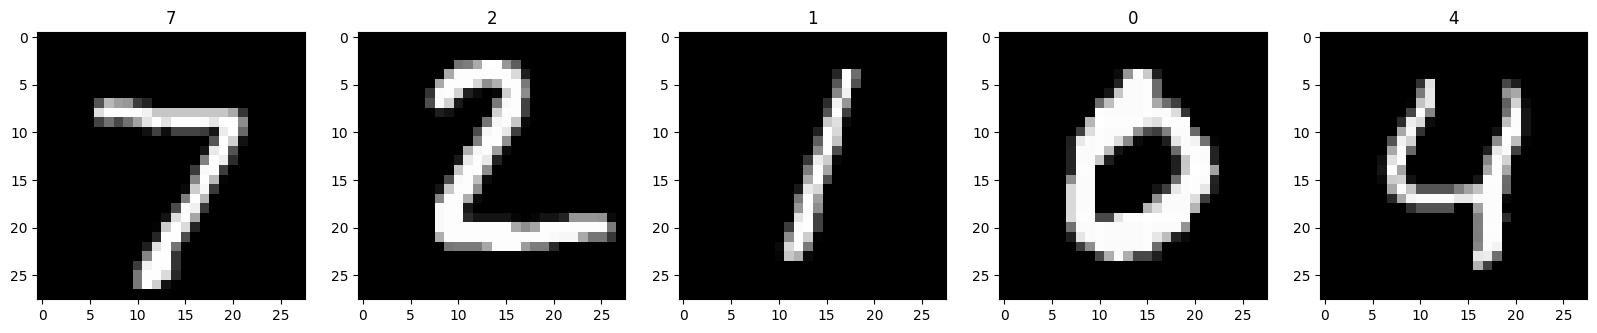

In [7]:
# load data into memory
resources_dir = Path('../resources').resolve()
data = utils.load_mnist(resources_dir)

# show the first five images with labels
utils.plot_images(data.testing_images[:5], data.testing_labels_digits[:5])

#### Training and testing functions
Using minibatch method

In [8]:
def train_network(network: NeuralNetwork, batches: list[tuple[NDArray, NDArray]], epochs: int, scale: float = 1.):
    """Trains the network using minibatch method 'epoch' number of times. Change the 'scale' input to adjust learning speed."""
    for _ in range(epochs):
        for image, label in batches:
            network.backprop_and_apply(image, label, scale)
        
def test_network(network: NeuralNetwork, test_images: NDArray, test_labels: NDArray, cost_tolerance: float) -> float:
    """
    Tests the accuracy of the network using 'test_images' and 'test_labels'.
    Returns the ratio between the correct outputs and all tests, so a number between 0.0 and 1.0.
    """
    assert test_images.shape[0] == test_labels.shape[0]
    num_of_tests = test_images.shape[0]
    passed = 0
    for i in range(num_of_tests):
        out = network(test_images[i, :])
        if network.cost(out, test_labels[i, :]) <= cost_tolerance:
            passed += 1
    return passed / num_of_tests

#### Training

In [9]:
nn = NeuralNetwork.new_network((28 * 28, 16, 16, 10), Sigmoid(), Cost())
mini_batch_size = 1000
num_of_epochs = 500
learning_scale = 1.
save_to: str | None = None # 'network.npz'

# create mini batches
mini_batches = [(data.training_images[i:i+mini_batch_size, ...], data.training_labels[i:i+mini_batch_size, ...]) 
                for i in range(0, data.training_images.shape[0], mini_batch_size)]
# training
train_network(nn, mini_batches, num_of_epochs, scale=learning_scale)

# saving to a file for later use
if not SAVE_DIR.exists():
    os.mkdir(SAVE_DIR)
if save_to is not None:
    nn.save_to_file(SAVE_DIR / save_to, overwrite=True)

#### Testing

In [10]:
get_from_file = True
if get_from_file:
    nn = NeuralNetwork.load_from_file(SAVE_DIR / save_to, Sigmoid(), Cost())

ratio = test_network(nn, data.testing_images, data.testing_labels, 0.1)

f"The network is correct {ratio * 100:.1f}% of the time. ({round(data.testing_images.shape[0] * ratio)}/{data.testing_images.shape[0]})"

'The network is correct 88.8% of the time. (8875/10000)'